## 1.导入依赖包

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

## 2.导入数据集

In [2]:
train = pd.read_csv('../../data/bike_train.csv')
test = pd.read_csv('../../data/bike_test.csv')

## 3.数据预处理

### 3.1查看数据的缺失值数目和数据类型

In [3]:
print(train.isnull().sum().sort_values(ascending=False))
print(test.isnull().sum().sort_values(ascending=False))
print(train.info())
print(test.info())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int6

### 3.2将数据转化为DataFrame类型

In [4]:
train.datetime = pd.to_datetime(train.datetime)
test.datetime = pd.to_datetime(test.datetime)
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dty

### 3.3重新定义数据集

In [5]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['week'] = train['datetime'].dt.week

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['week'] = test['datetime'].dt.week

print(train.tail(3))
print(test.tail(3))

                 datetime  season  holiday  workingday  weather   temp  \
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
10883  15.910        61    15.0013       4         164    168  2012     12   
10884  17.425        61     6.0032      12         117    129  2012     12   
10885  16.665        66     8.9981       4          84     88  2012     12   

       day  hour  week  
10883   19    21    51  
10884   19    22    51  
10885   19    23    51  
                datetime  season  holiday  workingday  weather   temp   atemp  \
6490 2012-12-31 21:00:00       1        0           1        1  10.66  12.880   
6491 2012-12-31 22:00:00       1        0           1        1  10.66  13.635   
6492 2012-12-31 23:00:00       1        0      

<ipython-input-5-b00714a7246c>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['week'] = train['datetime'].dt.week
<ipython-input-5-b00714a7246c>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['week'] = test['datetime'].dt.week


### 3.4查看各字段数据的相关性

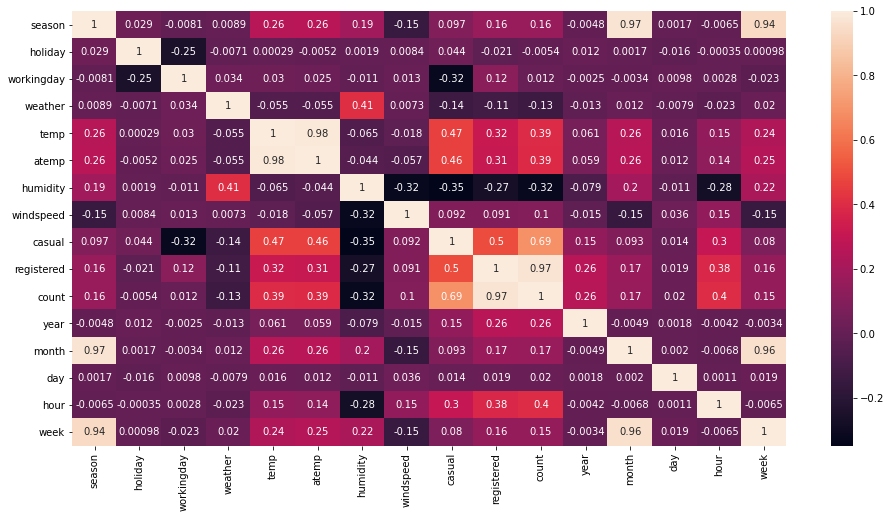

In [6]:
plt.figure(figsize=(16, 8))
sns.heatmap(train.corr(), annot=True)
plt.show()

### 3.5查看各数目出现的次数

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


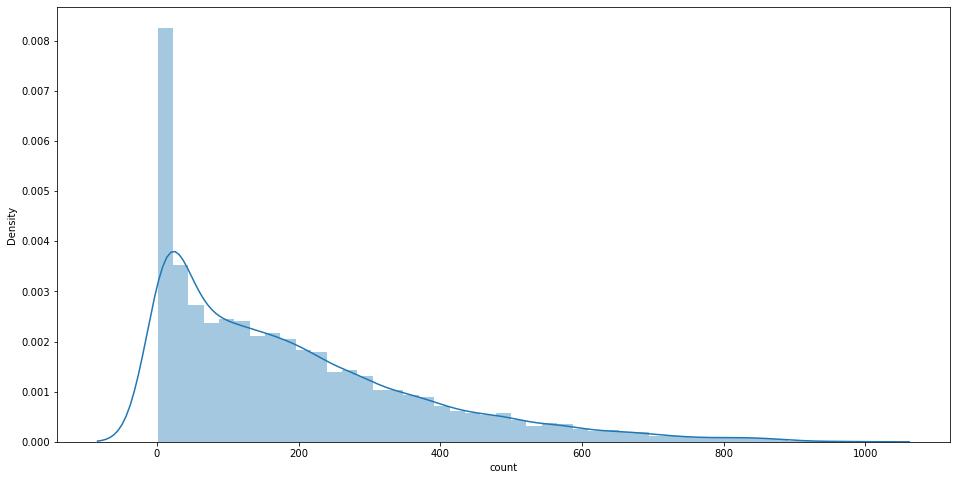

In [7]:
plt.figure(figsize=(16, 8))
sns.distplot(train['count'])
plt.show()

### 3.6查看数目的变化情况

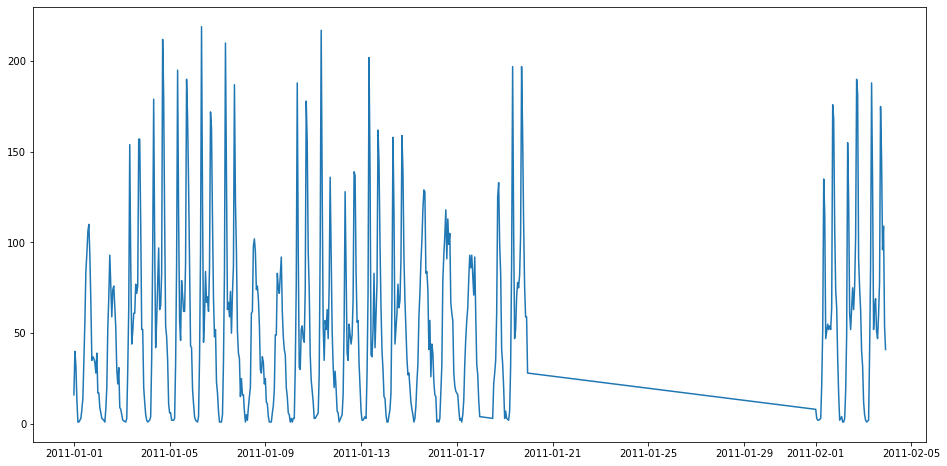

In [8]:
plt.figure(figsize=(16, 8))
plt.plot(train['datetime'][0:500], train['count'][0:500])
plt.show()

### 3.7查看数据的统计性描述

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   

   week  
0    52  
1    52  
2    52  


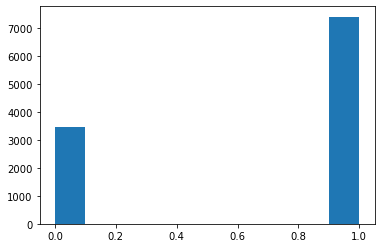

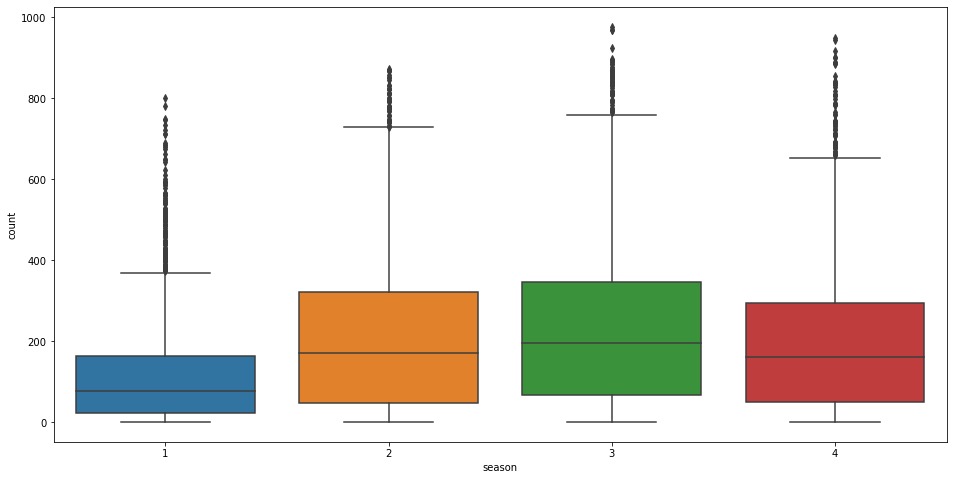

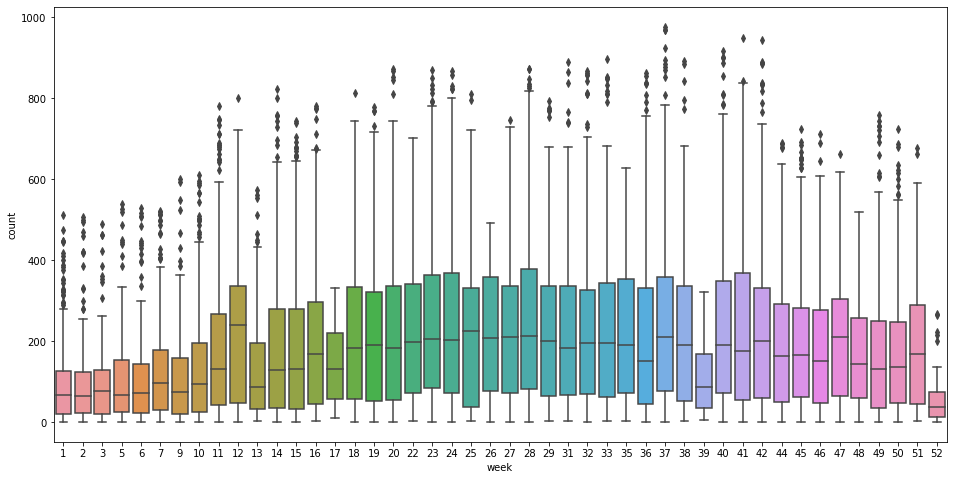

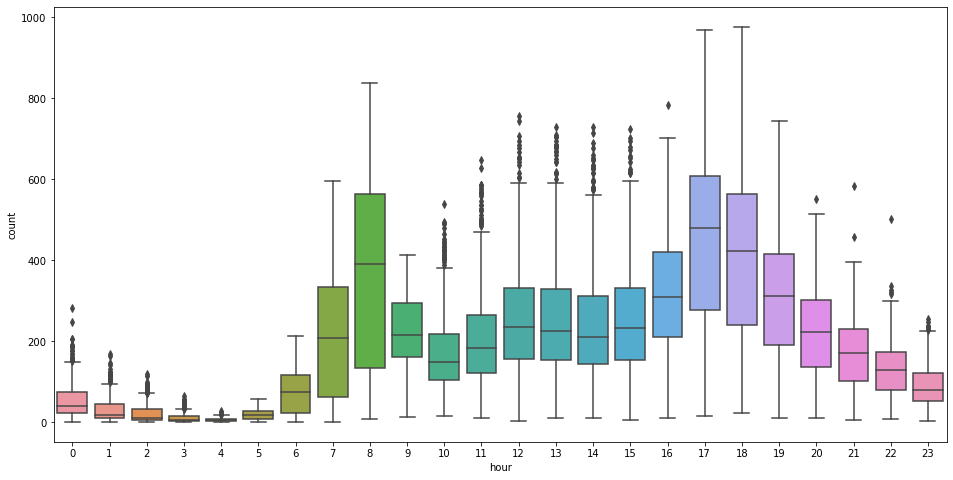

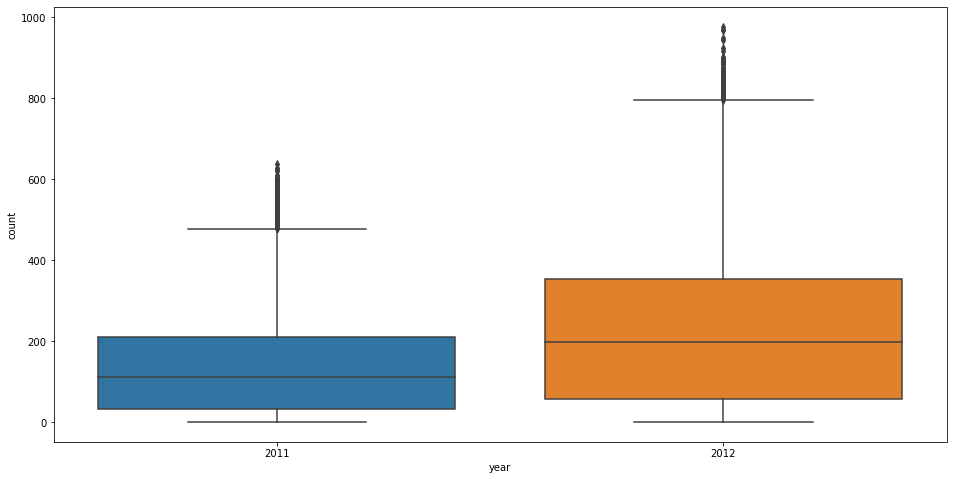

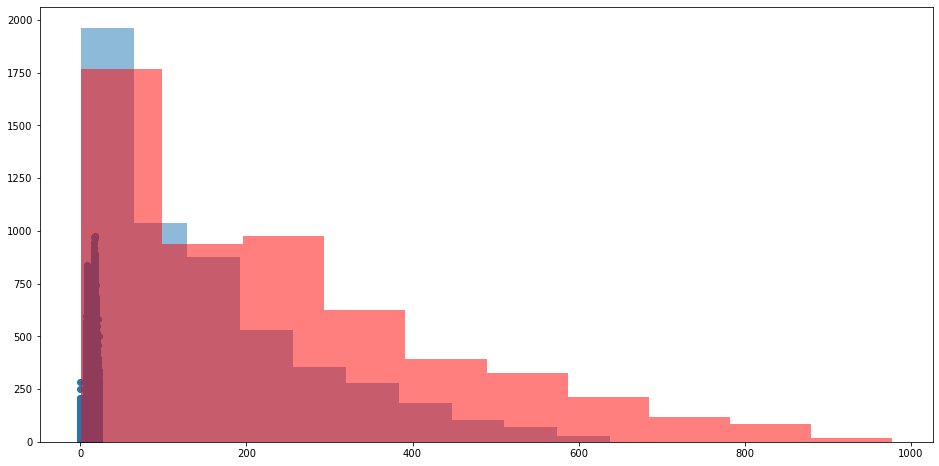

In [9]:
plt.hist(x='workingday', data=train)

plt.figure(figsize=(16, 8))
sns.boxplot(x='season', y='count', data=train)

plt.figure(figsize=(16, 8))
sns.boxplot(x='week', y='count', data=train)

plt.figure(figsize=(16, 8))
sns.boxplot(x='hour', y='count', data=train)

plt.figure(figsize=(16, 8))
sns.boxplot(x='year', y='count', data=train)

plt.figure(figsize=(16, 8))
plt.hist(train['count'][train['year'] == 2011], alpha=0.5, label='2011')
plt.hist(train['count'][train['year'] == 2012],alpha=0.5,label='2012',color='red')
plt.scatter(train['hour'], train['count'])
print(train.head(3))

### 3.8删除datetime这一列

In [10]:
del train['datetime']

In [11]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

season          2.0000
holiday         0.0000
workingday      1.0000
weather         1.0000
temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    186.0000
count         242.0000
year            1.0000
month           6.0000
day            10.0000
hour           12.0000
week           26.0000
dtype: float64


In [12]:
train_wind = train[~((train < (Q1 - 1.5 * IQR)) | 
                     (train > (Q3 + 1.5 * IQR))).any(axis=1)]
train_wind.dropna(inplace=True)

print(train.info())
print(train_wind.info())
print(train_wind.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
 15  week        10886 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 1.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9263 entries, 0 to 10885
Data columns (total 16

<ipython-input-12-b7279f372d1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_wind.dropna(inplace=True)


<AxesSubplot:xlabel='season', ylabel='windspeed'>

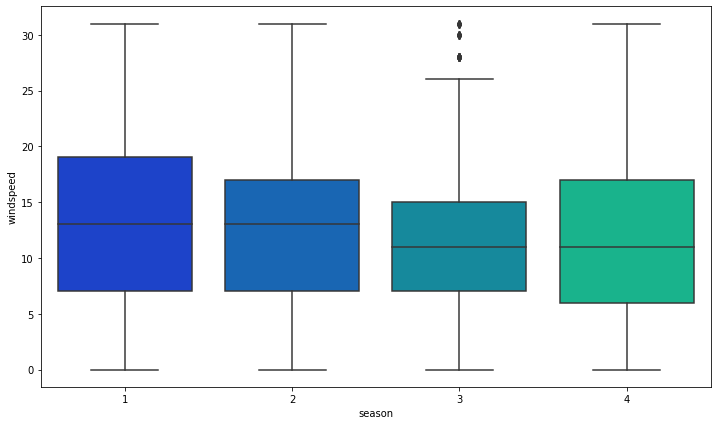

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='season', y='windspeed', data=train_wind, palette='winter')

In [14]:
def wind(cols):
    windspeed = cols[0]
    season = cols[1]
    if windspeed == 0:
        if season == 1:
            return 14
        elif season == 2:
            return 14
        else:
            return 13
    else:
        return windspeed


train_wind['wind'] = train_wind[['windspeed', 'season']].apply(wind, axis=1)
test['wind'] = test[['windspeed', 'season']].apply(wind, axis=1)

print(test.head(3))
print(train_wind.head(3))

<ipython-input-14-b63f5aebf5ff>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_wind['wind'] = train_wind[['windspeed', 'season']].apply(wind, axis=1)


             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   

   humidity  windspeed  year  month  day  hour  week     wind  
0        56    26.0027  2011      1   20     0     3  26.0027  
1        56     0.0000  2011      1   20     1     3  14.0000  
2        56     0.0000  2011      1   20     2     3  14.0000  
   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   

   casual  registered  count  year  month  day  hour  week  wind  
0       3          13     16  2011      1    1     

In [15]:
train_wind[['season', 'holiday', 'workingday', 'weather', 'year', 'month', 
            'day', 'hour', 'week']] = train_wind[['season', 'holiday', 
                                                  'workingday', 'weather', 
                                                  'year', 'month', 'day', 'hour', 
                                                  'week']].astype('category')
test[['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour', 
      'week']] = test[['season', 'holiday', 'workingday', 'weather', 'year', 
                       'month', 'day', 'hour','week']].astype('category')
print(train_wind.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9263 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      9263 non-null   category
 1   holiday     9263 non-null   category
 2   workingday  9263 non-null   category
 3   weather     9263 non-null   category
 4   temp        9263 non-null   float64 
 5   atemp       9263 non-null   float64 
 6   humidity    9263 non-null   int64   
 7   windspeed   9263 non-null   float64 
 8   casual      9263 non-null   int64   
 9   registered  9263 non-null   int64   
 10  count       9263 non-null   int64   
 11  year        9263 non-null   category
 12  month       9263 non-null   category
 13  day         9263 non-null   category
 14  hour        9263 non-null   category
 15  week        9263 non-null   category
 16  wind        9263 non-null   float64 
dtypes: category(9), float64(4), int64(4)
memory usage: 994.7 KB
None


C:\Anaconda\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
X = train_wind[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 
                'humidity', 'year', 'month', 'day', 'hour', 'week', 'wind']]
y = train_wind['count']

### 3.9切分训练集和测试集

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 3.10数据归一化

In [18]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [19]:
sc_X = MinMaxScaler()
sc_X.fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [20]:
sc_y = MinMaxScaler()
sc_y.fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

### 4.定义模型

In [21]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
print('MSE:', metrics.mean_squared_error(y_test, rf_prediction))

<ipython-input-21-6c8cf337375d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


MSE: 0.003911809664678144


### 5.数据可视化和训练模型

MSE: 0.007193167915613163


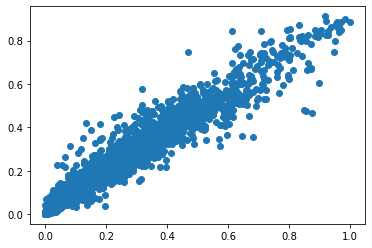

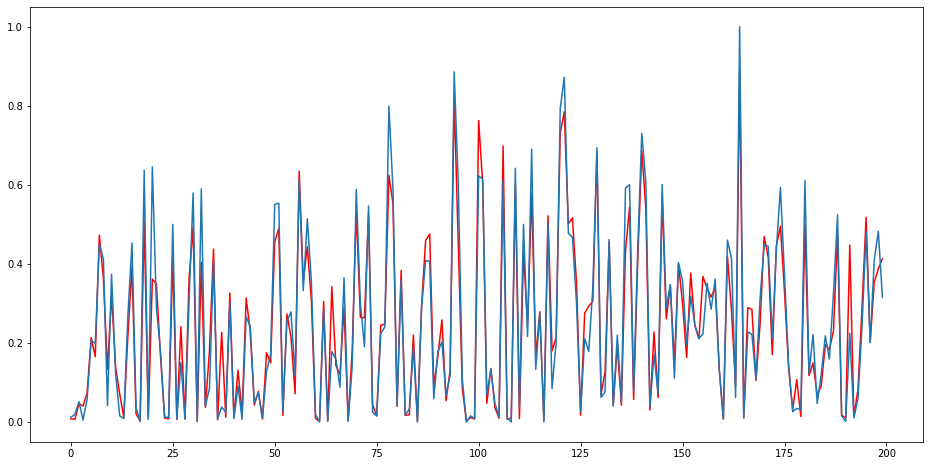

In [22]:
plt.scatter(y_test, rf_prediction)

plt.figure(figsize=(16, 8))
plt.plot(rf_prediction[0:200], 'r')
plt.plot(y_test[0:200])

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_prediction = dt_reg.predict(X_test)
print('MSE:', metrics.mean_squared_error(y_test, dt_prediction))

             datetime season holiday workingday weather   temp   atemp  \
0 2011-01-20 00:00:00      1       0          1       1  10.66  11.365   
1 2011-01-20 01:00:00      1       0          1       1  10.66  13.635   
2 2011-01-20 02:00:00      1       0          1       1  10.66  13.635   

   humidity  windspeed  year month day hour week     wind  
0        56    26.0027  2011     1  20    0    3  26.0027  
1        56     0.0000  2011     1  20    1    3  14.0000  
2        56     0.0000  2011     1  20    2    3  14.0000  


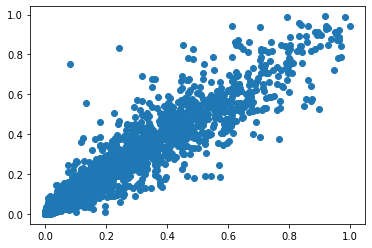

In [23]:
plt.scatter(y_test, dt_prediction)
print(test.head(3))

In [24]:
test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 
      'humidity', 'year', 'month', 'day', 'hour', 'week', 
      'wind']] =sc_X.fit_transform(test[['season', 'holiday', 
                                         'workingday', 'weather', 'temp', 'atemp',
                                         'humidity', 'year', 'month', 'day', 
                                         'hour', 'week', 'wind']])
test_pred = rf.predict(test[['season', 'holiday', 'workingday', 'weather', 'temp',
                             'atemp', 'humidity', 'year', 'month', 'day', 
                             'hour', 'week', 'wind']])
print(test_pred)

[0.01412564 0.01047538 0.00989813 ... 0.27524618 0.22544992 0.20533107]


In [25]:
test_pred = test_pred.reshape(-1, 1)
test_pred = sc_y.inverse_transform(test_pred)
test_pred = pd.DataFrame(test_pred, columns=['count'])
df = pd.concat([test['datetime'], test_pred], axis=1)
print(df.head(3))

             datetime     count
0 2011-01-20 00:00:00  0.014126
1 2011-01-20 01:00:00  0.010475
2 2011-01-20 02:00:00  0.009898


## 6.将结果写入预测文件中

In [26]:
df['count'] = df['count'].astype('int')
df.to_csv('submission.csv', index=False)